# Looking at cold waves in UKESM1

This notebook shows the code to calculate cold waves based off the methodology used in a Master's dissertation. This notebook is for UKESM1 simulation over London.

# 1.1 Import packages and files

In [1]:
import xarray as xr
import matplotlib
import xclim 

In [2]:
filename='tasmin_UKESM1_London.nc'
ds_tmin = xr.open_dataset(filename)

In [3]:
# load the coordinates
lat=ds_tmin['lat']
lon=ds_tmin['lon']
# load the variables themselves
tasmin=ds_tmin.tasmin
tasmin

<xarray.DataArray 'tasmin' (time: 90360, lat: 1, lon: 1)> Size: 361kB
[90360 values with dtype=float32]
Coordinates:
  * time     (time) object 723kB 1850-01-01 12:00:00 ... 2100-12-30 12:00:00
  * lat      (lat) float64 8B 51.88
  * lon      (lon) float64 8B 0.9375
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Minimum Near-Surface Air Temperature
    comment:        minimum near-surface (usually, 2 meter) air temperature (...
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 4096)
    cell_methods:   area: mean time: minimum time: mean
    cell_measures:  area: areacella
    history:        2019-06-24T15:19:28Z altered by CMOR: Treated scalar dime...

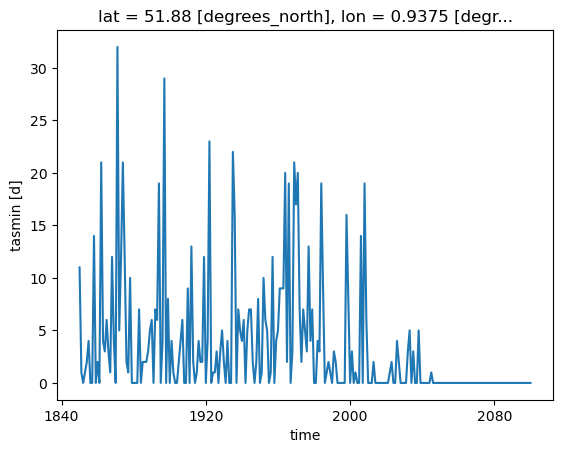

In [4]:
frost_days = xclim.indices.frost_days(tasmin, freq='YS')
frost_days.plot()

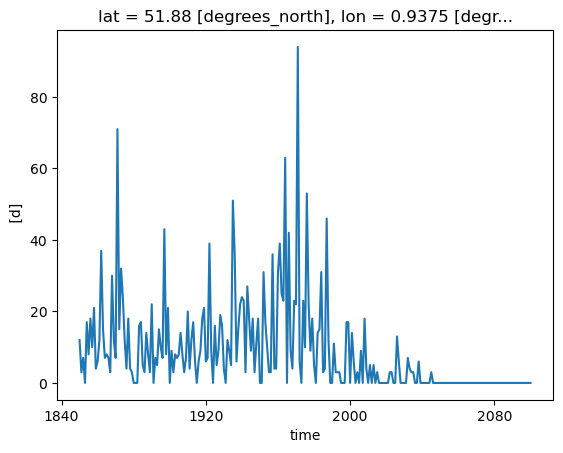

In [6]:
tasmin_1961_1990 = tasmin.loc['1961':'1990']
tn10 = xclim.core.calendar.percentile_doy(tasmin_1961_1990, per=10).sel(percentiles=10)
cold_spell_days=xclim.indices.cold_spell_duration_index(tasmin, tn10,window=3)
cold_spell_days.plot()

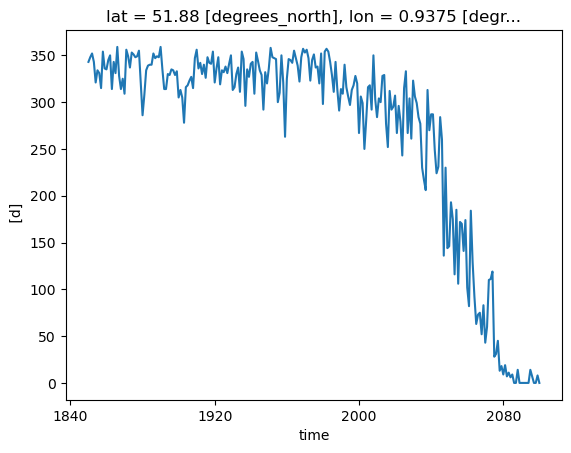

In [7]:
tasmin_end21st = tasmin.loc['2071':'2100']
tn10 = xclim.core.calendar.percentile_doy(tasmin_end21st, per=10).sel(percentiles=10)
cold_spell_days=xclim.indices.cold_spell_duration_index(tasmin, tn10,window=3)
cold_spell_days.plot()

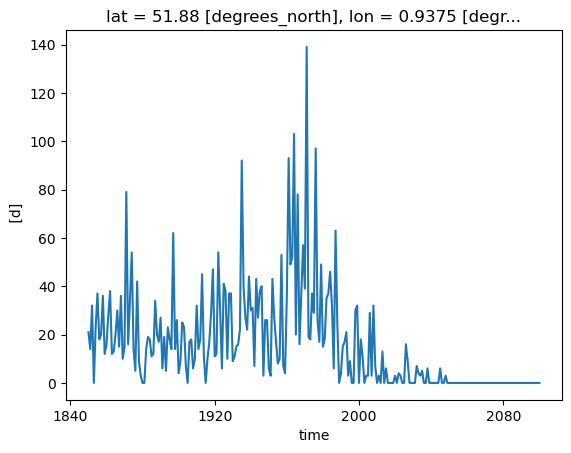

In [8]:
tasmin_preind = tasmin.loc['1850':'1900']
tn10 = xclim.core.calendar.percentile_doy(tasmin_preind, per=10).sel(percentiles=10)
cold_spell_days=xclim.indices.cold_spell_duration_index(tasmin, tn10,window=3)
cold_spell_days.plot()

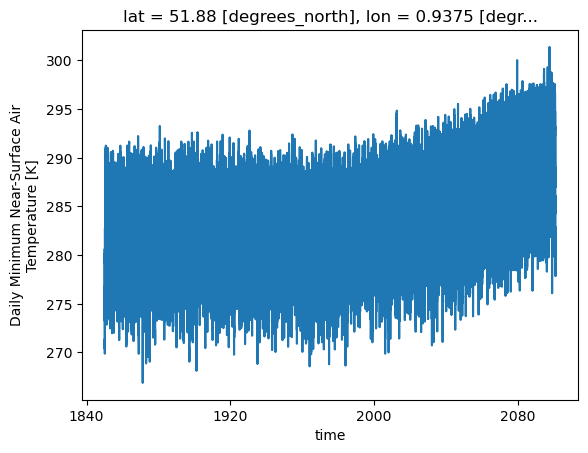

In [10]:
tasmin.plot()